# **DATASET GENERATE**

AGE :    
- Over 55 years (1)
- 45 - 55 years (2)
- 35 - 44 years (3)
- Under 35 Years (4)

EXPENSES :
- LEBIH DARI 75 % dari income (1)
- 50-75 % dari income (2)
- 25-50% dari income (3)
- Dibawah 25% (4)

FINANCIAL STATUS :
- debts > asset (1)
- debts = asset (2)
- debts < asset (3)
- have invest of pension (4)

EXPERIENCE :
- Bank Deposit (1)
- Bonds (Obligasi) (2)
- Fixed Income (Pendapatan Tetap) (3)
- High Rate Asset (4)

ESTIMATED PERIOD :
- Under 1 year (1)
- 1 - 3 year (2)
- 3 - 5 year (3)
- Over 5 year (4)

SCENARIO :
- return 2.5% loss 0% (1)
- return 7% loss 1% (2)
- return 15% loss 5% (3)
- return 25% loss 15% (4)

UNWILLING TO ACCEPT (**TOLERANSI KERUGIAN**):
- Below 5% (1)
- 5-10% (2)
- 10-20% (3)
- Above 20% (4)


In [1]:
import random
import pandas as pd
import numpy as np
np.random.seed(42)

# Generate random values for customer attributes
ages = [random.randint(1, 4) for i in range(10000)]
salary = [random.uniform(1812935, 100000000) for i in range(10000)]
expenses = [random.randint(1, 4) for i in range(10000)]
financial_status = [random.randint(1, 4) for i in range(10000)]
experience = [random.randint(1, 4) for i in range(10000)]
estimated_period = [random.randint(1, 4) for i in range(10000)]
unwilling_toAccept = [random.randint(1, 4) for i in range(10000)]
scenario = [random.randint(1, 4) for i in range(10000)]

# Create a DataFrame to store the data
df = pd.DataFrame({
    'age': ages,
    'salary': np.round(salary),
    'expenses': expenses,
    'financial_status': financial_status,
    'experience' : experience,
    'estimated_period' : estimated_period,
    'unwilling_toAccept' : unwilling_toAccept,
    'scenario' : scenario
})

# Calculate summary statistics for the data
print(df.describe())

# Create a visualization to show the distribution of risk profiles
# df.groupby('expenses').size().plot(kind='bar')

                age        salary      expenses  financial_status  \
count  10000.000000  1.000000e+04  10000.000000        10000.0000   
mean       2.501000  5.077415e+07      2.507700            2.4841   
std        1.118984  2.844038e+07      1.115915            1.1203   
min        1.000000  1.844672e+06      1.000000            1.0000   
25%        1.000000  2.618047e+07      2.000000            1.0000   
50%        3.000000  5.110795e+07      3.000000            2.0000   
75%        4.000000  7.521313e+07      4.000000            3.0000   
max        4.000000  9.999217e+07      4.000000            4.0000   

         experience  estimated_period  unwilling_toAccept      scenario  
count  10000.000000      10000.000000        10000.000000  10000.000000  
mean       2.493200          2.502300            2.522600      2.518100  
std        1.114934          1.116924            1.119917      1.117764  
min        1.000000          1.000000            1.000000      1.000000  
25%     

In [2]:
df.shape

(10000, 8)

In [3]:
df.salary.astype(int)

0       24902619
1        8242488
2       92337474
3       31172488
4       14982433
          ...   
9995    46598235
9996    53982761
9997    11441144
9998    18784618
9999    66544427
Name: salary, Length: 10000, dtype: int64

In [4]:
df.expenses.value_counts()

4    2514
2    2513
3    2511
1    2462
Name: expenses, dtype: int64

In [5]:
df.skew()

age                  -0.003360
salary               -0.002120
expenses             -0.008090
financial_status      0.021834
experience            0.004299
estimated_period      0.000049
unwilling_toAccept   -0.025558
scenario             -0.018707
dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

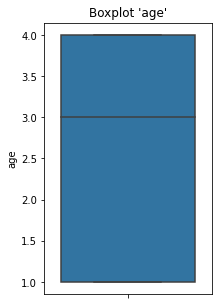

age Skewness: -0.0033597805921406283
Columns 'age' normal distribution


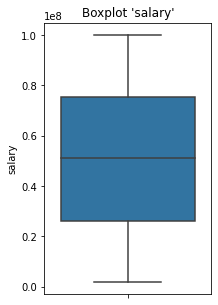

salary Skewness: -0.0021203650548436365
Columns 'salary' normal distribution


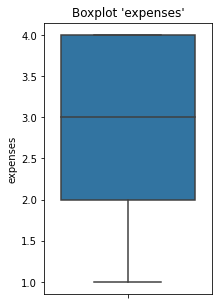

expenses Skewness: -0.00808973932264715
Columns 'expenses' normal distribution


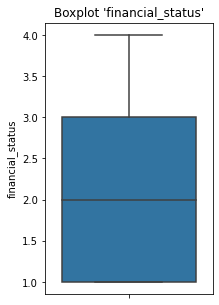

financial_status Skewness: 0.02183352579619926
Columns 'financial_status' normal distribution


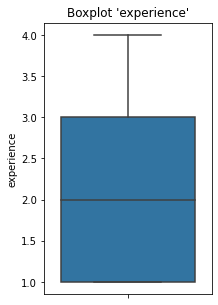

experience Skewness: 0.004299114636452311
Columns 'experience' normal distribution


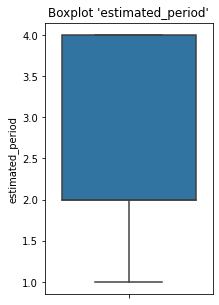

estimated_period Skewness: 4.879107313975869e-05
Columns 'estimated_period' normal distribution


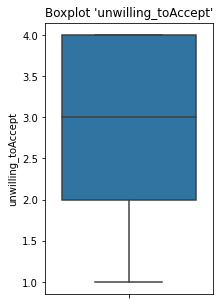

unwilling_toAccept Skewness: -0.025558263874895754
Columns 'unwilling_toAccept' normal distribution


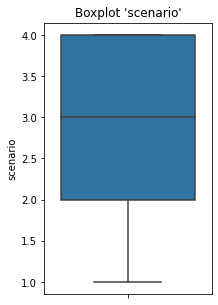

scenario Skewness: -0.018706523847575852
Columns 'scenario' normal distribution


In [7]:
def plot_outlier(df, col):
    fig, ax = plt.subplots(figsize = (3, 5))
    
    sns.boxplot(y=df[col], ax =  ax)
    ax.set_title(f"Boxplot '{col}'")
    plt.show()
    
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

for col in df.columns:
    plot_outlier(df, col)

In [8]:
df.columns

Index(['age', 'salary', 'expenses', 'financial_status', 'experience',
       'estimated_period', 'unwilling_toAccept', 'scenario'],
      dtype='object')

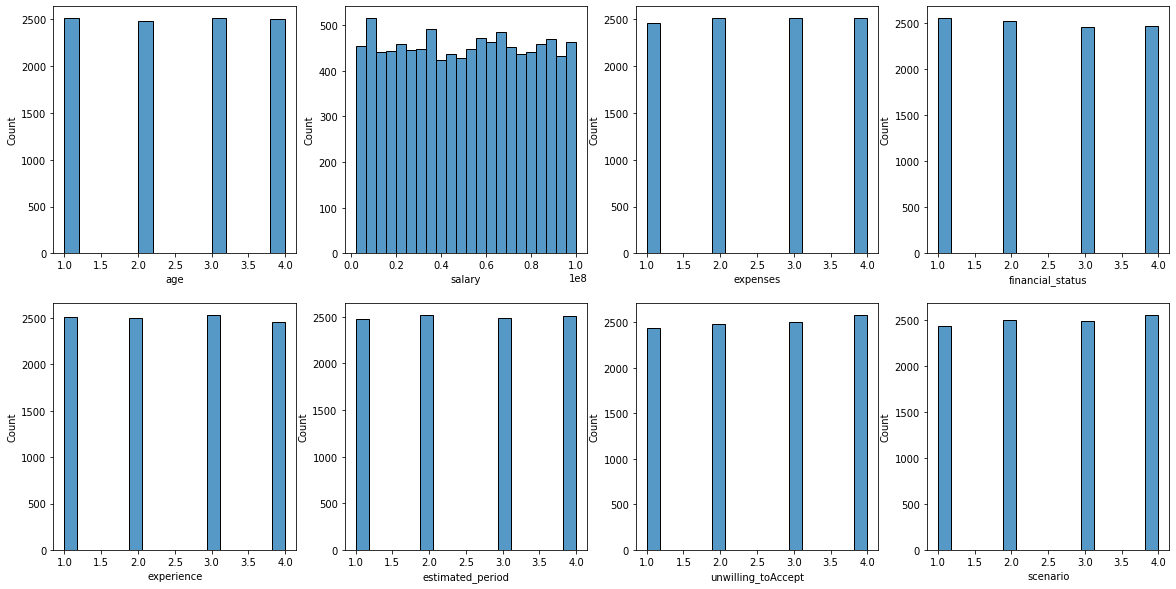

In [9]:
cols = ['age', 'salary', 'expenses', 'financial_status', 'experience',
       'estimated_period', 'unwilling_toAccept', 'scenario']
fig, ax = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
x=0
for i in range(2):
  for j in range(4):
    try:
      sns.histplot(df[cols[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

In [10]:
df.duplicated().sum()

0

## **FILTERING BASED ON INDIVIDUAL SCORES**
1. "<10"   = Low Risk (**Very Cautious**)
2. "11-15" = Low to moderate Risk (**Cautious**)
3. "16-21" = Moderate to moderately high risk (**Balanced**)
4. "22-26" = High Risk (**Adventurous**)
5. ">26"   = Very High risk (**Speculative**)

### **LOW RISK**

In [11]:
low_risk_threshold = 10

low_risk = df[df[['age', 'expenses', 'financial_status', 'experience',
       'estimated_period', 'unwilling_toAccept', 'scenario']].sum(axis=1).isin([low_risk_threshold])]

In [12]:
low_risk.count()

age                   66
salary                66
expenses              66
financial_status      66
experience            66
estimated_period      66
unwilling_toAccept    66
scenario              66
dtype: int64

### **LOW TO MODERATE RISK**

In [13]:
lowtoMed_threshold = 11

lowtoMed_risk = df[df[['age', 'expenses', 'financial_status', 'experience',
       'estimated_period', 'unwilling_toAccept', 'scenario']].sum(axis=1).isin([lowtoMed_threshold, lowtoMed_threshold+1, lowtoMed_threshold+2, lowtoMed_threshold+3, lowtoMed_threshold+4])]

In [14]:
lowtoMed = pd.DataFrame(lowtoMed_risk)

In [15]:
lowtoMed.count()

age                   2410
salary                2410
expenses              2410
financial_status      2410
experience            2410
estimated_period      2410
unwilling_toAccept    2410
scenario              2410
dtype: int64

### **MODERATE TO HIGH RISK**

In [16]:
med_threshold = 16

med_risk = df[df[['age', 'expenses', 'financial_status', 'experience',
       'estimated_period', 'unwilling_toAccept', 'scenario']].sum(axis=1).isin([med_threshold, med_threshold+1, med_threshold+2, med_threshold+3, med_threshold+4, med_threshold+5])]

In [17]:
med_risk.count()

age                   6590
salary                6590
expenses              6590
financial_status      6590
experience            6590
estimated_period      6590
unwilling_toAccept    6590
scenario              6590
dtype: int64

In [18]:
med = pd.DataFrame(med_risk)

### **HIGH RISK**

In [19]:
high_threshold = 22

high_risk = df[df[['age', 'expenses', 'financial_status', 'experience',
       'estimated_period', 'unwilling_toAccept', 'scenario']].sum(axis=1).isin([high_threshold, high_threshold+1, high_threshold+2, high_threshold+3, high_threshold+4])]

In [20]:
high_risk.count()

age                   909
salary                909
expenses              909
financial_status      909
experience            909
estimated_period      909
unwilling_toAccept    909
scenario              909
dtype: int64

In [21]:
high = pd.DataFrame(high_risk)

### **VERY HIGH RISK**

In [22]:
veryHigh_threshold = 26

veryHigh_risk = df[df[['age', 'expenses', 'financial_status', 'experience',
       'estimated_period', 'unwilling_toAccept', 'scenario']].sum(axis=1).isin([veryHigh_threshold, veryHigh_threshold+1, veryHigh_threshold+2])]

In [23]:
veryHigh_risk.count()

age                   24
salary                24
expenses              24
financial_status      24
experience            24
estimated_period      24
unwilling_toAccept    24
scenario              24
dtype: int64

In [24]:
veryHigh = pd.DataFrame(veryHigh_risk)